In [1]:
import os
import shutil
import cv2
from skimage import io
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches

from tqdm.notebook import tqdm

In [2]:
# Get all filenames
imgs = sorted(glob('imgs_aligned/20*'))

In [3]:
# Extract number of images
N_total = len(imgs)
N_total

7777

In [4]:
# Compute mean image to know the extent
imgs_subset = [io.imread(f) for f in tqdm(imgs[::100])]

  0%|          | 0/78 [00:00<?, ?it/s]

In [5]:
subset_mean = np.mean(imgs_subset, axis=0).astype('uint8')
del imgs_subset
subset_mean.shape

(2160, 3840, 3)

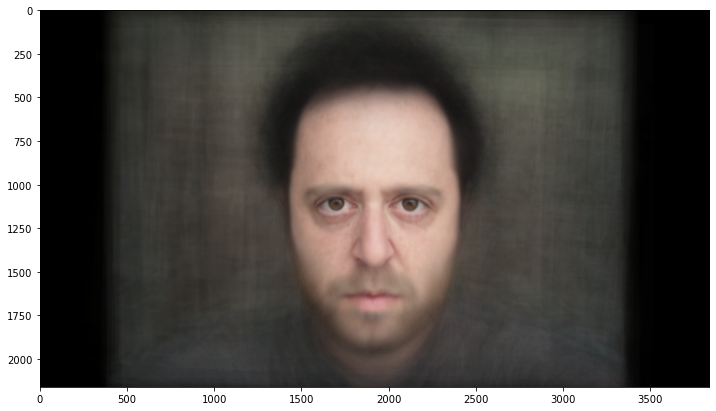

In [6]:
plt.figure(figsize=(12, 10))
plt.imshow(subset_mean);

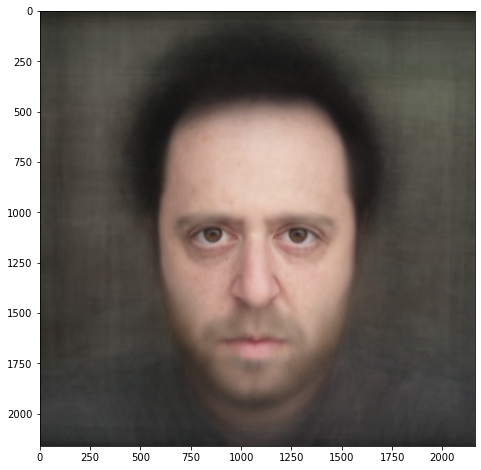

In [7]:
img_square = subset_mean[:, 840:-840]
plt.figure(figsize=(8, 8))
plt.imshow(img_square);

In [8]:
img_square.shape

(2160, 2160, 3)

# Store squars as npy files

In [9]:
nth = 30
out_dir = 'imgs_npy_%d' % nth

In [10]:
npys = sorted(glob('imgs_npy_%d/*npz' % nth))
len(npys)

259

# Create a tile

In [11]:
im = np.load(npys[-1])['arr_0'].astype('uint8')
im.shape

(2160, 2160, 3)

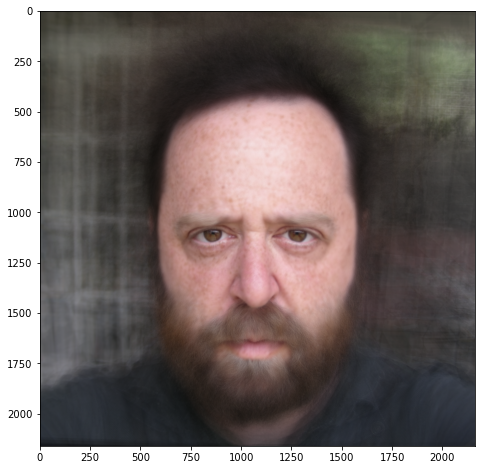

In [12]:
plt.figure(figsize=(8, 8))
plt.imshow(im)

# Yearly diagonal

In [13]:
# Which resolution
nth = 365

In [14]:
# Define source for images
source = imgs[::nth]

In [15]:
# Collect number of slithers needed
n_steps = len(source)
n_steps

22

In [16]:
# Collect number of possible diagonals
possible_diagonals = len(im)*2
possible_diagonals

4320

In [17]:
# Get size of slithers
step_size = int(np.floor(possible_diagonals / n_steps))
step_size

196

In [18]:
# Compute offset to account for rounding
offset = possible_diagonals - n_steps*step_size
offset

8

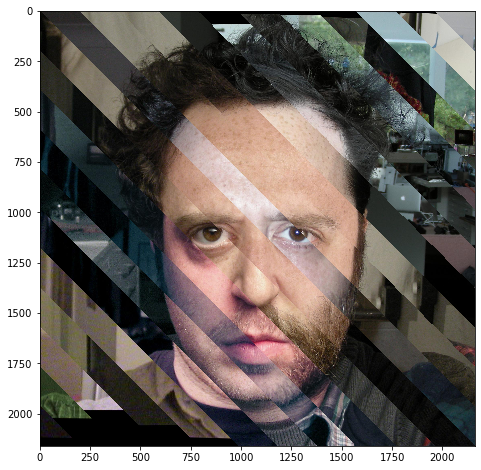

In [175]:
plt.figure(figsize=(8, 8))
plt.imshow(collage, interpolation='nearest');

In [176]:
# Save file to output
out_filename = 'noah_%d_days_diagonal.jpg' % (nth)
io.imsave(out_filename, collage)

# Weekly diagonal

In [28]:
# Which resolution
nth = 30

In [29]:
# Define source for images
source = imgs[::nth]

In [30]:
# Collect number of slithers needed
n_steps = len(source)
n_steps

260

In [31]:
# Collect number of possible diagonals
possible_diagonals = len(im)*2
possible_diagonals

4320

In [32]:
# Get size of slithers
step_size = int(np.floor(possible_diagonals / n_steps))
step_size

16

In [33]:
# Compute offset to account for rounding
offset = possible_diagonals - n_steps*step_size
offset

160

In [34]:
# Create empty collage
collage = np.zeros(im.shape)

for i in tqdm(range(n_steps)):
    
    # Create canvas
    canvas = np.ones(im.shape[:2])

    # Get slither
    idx = int(offset/2 + i* step_size - possible_diagonals/2)
    canvas = (np.tril(canvas, k=idx+step_size) - np.tril(canvas, k=idx)).astype('uint8')[..., None]

    # Load image
    im = io.imread(source[i])[:, 840:-840].astype('uint8')
    
    collage += im * canvas

collage = collage.astype('uint8')

  0%|          | 0/260 [00:00<?, ?it/s]

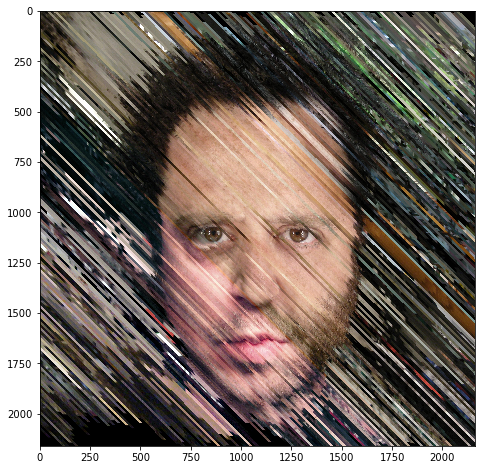

In [35]:
plt.figure(figsize=(8, 8))
plt.imshow(collage, interpolation='nearest');

In [36]:
# Save file to output
out_filename = 'noah_%d_days_diagonal.jpg' % (nth)
io.imsave(out_filename, collage)

# Weekly diagonal

In [19]:
# Which resolution
nth = 7

In [20]:
# Define source for images
source = imgs[::nth]

In [21]:
# Collect number of slithers needed
n_steps = len(source)
n_steps

1111

In [22]:
# Collect number of possible diagonals
possible_diagonals = len(im)*2
possible_diagonals

4320

In [23]:
# Get size of slithers
step_size = int(np.floor(possible_diagonals / n_steps))
step_size

3

In [24]:
# Compute offset to account for rounding
offset = possible_diagonals - n_steps*step_size
offset

987

In [25]:
# Create empty collage
collage = np.zeros(im.shape)

  0%|          | 0/1111 [00:00<?, ?it/s]

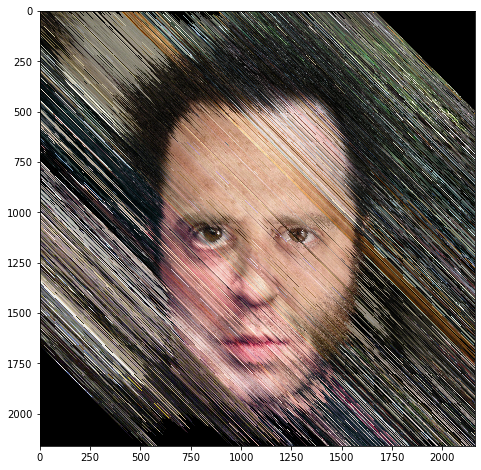

In [26]:
for i in tqdm(range(n_steps)):
    
    # Create canvas
    canvas = np.ones(im.shape[:2])

    # Get slither
    idx = int(offset/2 + i* step_size - possible_diagonals/2)
    canvas = (np.tril(canvas, k=idx+step_size) - np.tril(canvas, k=idx)).astype('uint8')[..., None]

    # Load image
    im = io.imread(source[i])[:, 840:-840].astype('uint8')
     
    collage += im * canvas

collage = collage.astype('uint8')

plt.figure(figsize=(8, 8))
plt.imshow(collage, interpolation='nearest');

In [27]:
# Save file to output
out_filename = 'noah_%d_days_diagonal.jpg' % (nth)
io.imsave(out_filename, collage)

# Video

In [69]:
# Which resolution
nth = 30

In [70]:
# Define source for images
source = imgs[::nth]

In [71]:
# Collect number of slithers needed
n_steps = len(source)
n_steps

260

In [72]:
# Load all images into memory (only works for big enough nth)
source_imgs = np.array([io.imread(source[i])[:, 840:-840].astype('uint8') for i in tqdm(range(n_steps))])

  0%|          | 0/260 [00:00<?, ?it/s]

In [73]:
# Collect number of possible diagonals
possible_diagonals = len(im)*2
possible_diagonals

4320

In [74]:
# Get size of slithers
step_size = int(np.floor(possible_diagonals / n_steps))
step_size

16

In [75]:
# Compute offset to account for rounding
offset = possible_diagonals - n_steps*step_size
offset

160

In [79]:
!rm -rf imgs_collage_diagonal
out_dir = 'imgs_collage_diagonal'
if not os.path.exists(out_dir):
    os.makedirs(out_dir)

In [80]:
counter = np.arange(n_steps)

for count in tqdm(range(n_steps)):
    
    # Create empty collage
    collage = np.zeros(im.shape)

    for i in counter:

        # Create canvas
        canvas = np.ones(im.shape[:2])

        # Get slither
        idx = int(offset/2 + i* step_size - possible_diagonals/2)
        canvas = (np.tril(canvas, k=idx+step_size) - np.tril(canvas, k=idx)).astype('uint8')[..., None]

        collage += source_imgs[counter[i]] * canvas

    collage = collage.astype('uint8')
    
    counter -= 1
    counter[counter<0] = n_steps-1

    # Save file to output
    out_filename = 'noah_%dx%d_%05d_diagonal_video.jpg' % (nth, nth, count)
    io.imsave(os.path.join(out_dir, out_filename), collage)

  0%|          | 0/260 [00:00<?, ?it/s]

In [81]:
!rm video_collage_diagonal_*.mp4
!cat imgs_collage_diagonal/*jpg | ffmpeg -f image2pipe -r 12 -vcodec mjpeg -i - -vcodec libx264 video_collage_diagonal_12.mp4
!cat imgs_collage_diagonal/*jpg | ffmpeg -f image2pipe -r 24 -vcodec mjpeg -i - -vcodec libx264 video_collage_diagonal_24.mp4

rm: video_collage_diagonal_*.mp4: No such file or directory
ffmpeg version 4.4 Copyright (c) 2000-2021 the FFmpeg developers
  built with clang version 11.1.0
  configuration: --prefix=/Users/mnotter/opt/anaconda3/envs/adsml --cc=x86_64-apple-darwin13.4.0-clang --disable-doc --disable-openssl --enable-avresample --enable-demuxer=dash --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-libx265 --enable-libaom --enable-libxml2 --enable-libvpx --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/Users/runner/miniforge3/conda-bld/ffmpeg_1635310033626/_build_env/bin/pkg-config
  libavutil      56. 70.100 / 56. 70.100
  libavcodec     58.134.100 / 58.134.100
  libavformat    58. 76.100 / 58. 76.100
  libavdevice    58. 13.100 / 58. 13.100
  libavfilter     7.110.100 /  7.110.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  9.100